In [1]:
import os
import sys

sys.path.append("../python")

import matplotlib.pyplot as plt
import numpy as np

In [2]:
from data import Dataloader
from models import HeuristicModel
from metrics import PairsExplained, ClusterIntersection

In [3]:
# Loading the data
data_loader = Dataloader("../data/dataset_10") 
Z = data_loader.get_ground_truth_labels()
X, Y = data_loader.load()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-12-11
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-7700HQ CPU @ 2.80GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 13828 rows, 55128 columns and 505826 nonzeros
Model fingerprint: 0x373fb866
Coefficient statistics:
  Matrix range     [5e-06, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-03, 1e+00]
Presolve removed 20 rows and 41311 columns
Presolve time: 0.29s
Presolved: 13808 rows, 13817 columns, 415700 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.05s

Barrier statistics:
 Dense cols : 50
 AA' NZ     : 4.019e+05
 Factor NZ  : 4.170e+05 (roughly 16 MB of memory)
 Factor Ops : 1.268e+07 (less than 1 second per iteration)
 Threads    : 8

                  Objective   

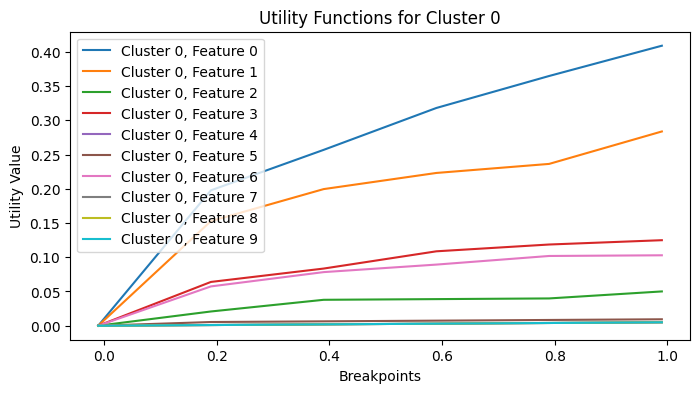

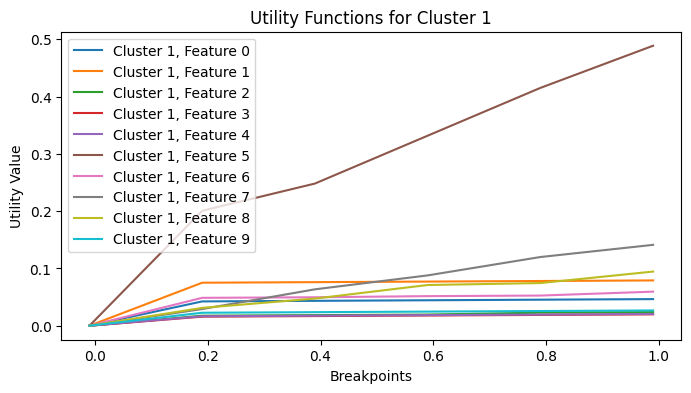

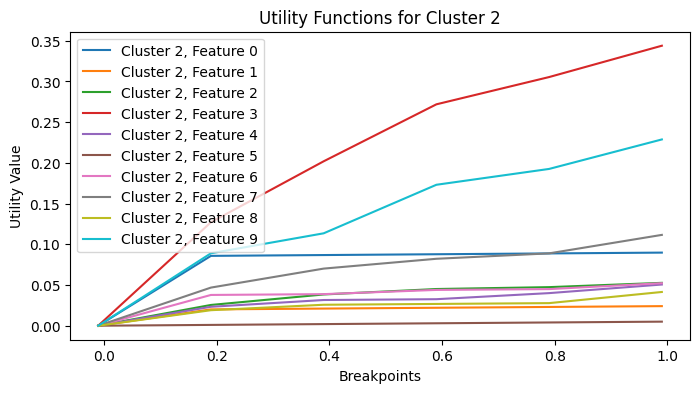

In [4]:
parameters = {"n_clusters" : 3,
              "n_pieces": 5,
              "nb_criteres": 10
              } 
model = HeuristicModel(**parameters)
model.fit(X, Y)

In [5]:
pairs_explained = PairsExplained()
cluster_intersection = ClusterIntersection()

In [6]:
print("Percentage of explained preferences on train data:", pairs_explained.from_model(model, X, Y))
print("Percentage of preferences well regrouped into clusters:", cluster_intersection.from_model(model, X, Y, Z))

Percentage of explained preferences on train data: 0.9787510624468777
Percentage of preferences well regrouped into clusters: 0.8361394684946886


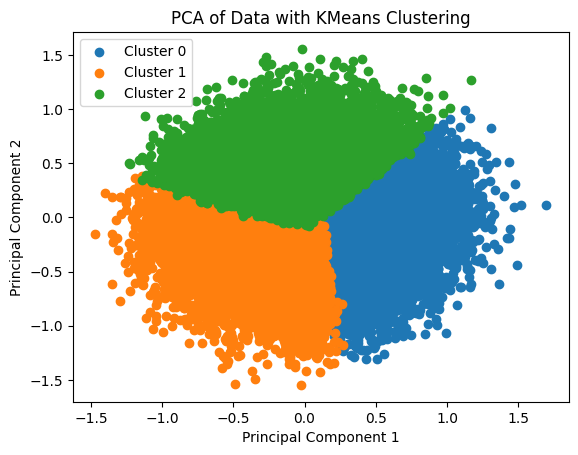

In [7]:

from sklearn.decomposition import PCA

# Apply PCA
array = X-Y
clustering  =model.kmean
pca = PCA(n_components=2)
array_pca = pca.fit_transform(array)

# Create a scatter plot with different colors for each cluster
for cluster in np.unique(clustering):
    indices = np.where(clustering == cluster)
    plt.scatter(array_pca[indices, 0], array_pca[indices, 1], label=f'Cluster {cluster}')

plt.title('PCA of Data with KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()